# AMES HOUSE PREDICTION

## PROJECT ARCHITECTURE

- Goal
- Import Libraries & Load Data
- EDA(Exploratory Data Analysis)
    - General Overwiew
    - Check it out columns(All)
        - General Check
        - Null Data Check
        - Fill Data Check
        - Delete Data Check
        - outlier check
        - clean check
        - Visualization Check
        - Editing Check
        - Fixing Error Check
    - Feature Engineering
    - Scaling and Normalization
    - PCA
- Modelling
    - Choose Target & Show Correlation With Other
    - Train & Test
        - Dont Repeat Yourself Function
- Conclusion(Prediction)
    - R2_Square Score
    - Mean Absolute Error
    - Mean Squared Error
- Model Evalutaion
    - Feature Importance
    - Feature Engineering
    - R2_Square Score Rising
    - MAW Descent
    - Conlusion
        - Presentation

# Libraries

In [2]:
import FUNC_SAXO

In [3]:
from FUNC_SAXO import pd

In [4]:
df = pd.read_csv("train.csv")

In [5]:
from FUNC_SAXO import regression_test

In [6]:
import pandas as pd
pd.set_option('display.max_columns',100)

import numpy as np

import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


# EDA

In [7]:
# veri elden geçirme, veriyi kontrol etme

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [12]:
pd.set_option("display.max_rows",500)

In [13]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
outlier = df.quantile(q=.97, numeric_only = True)

In [16]:
outlier

Id                 1416.23
MSSubClass          160.00
LotFrontage         120.00
LotArea           21571.80
OverallQual           9.00
OverallCond           8.00
YearBuilt          2007.00
YearRemodAdd       2008.00
MasVnrArea          574.41
BsmtFinSF1         1375.99
BsmtFinSF2          546.23
BsmtUnfSF          1589.38
TotalBsmtSF        1905.46
1stFlrSF           1981.61
2ndFlrSF           1245.53
LowQualFinSF          0.00
GrLivArea          2633.23
BsmtFullBath          1.00
BsmtHalfBath          1.00
FullBath              2.00
HalfBath              1.00
BedroomAbvGr          4.00
KitchenAbvGr          2.00
TotRmsAbvGrd         10.00
Fireplaces            2.00
GarageYrBlt        2008.00
GarageCars            3.00
GarageArea          884.00
WoodDeckSF          385.38
OpenPorchSF         213.23
EnclosedPorch       216.00
3SsnPorch             0.00
ScreenPorch         192.00
PoolArea              0.00
MiscVal             400.00
MoSold               12.00
YrSold             2010.00
S

In [17]:
abs(df.corr(numeric_only = True)["SalePrice"]).sort_values(ascending = True).tail(24)

BedroomAbvGr    0.168213
BsmtUnfSF       0.214479
BsmtFullBath    0.227122
LotArea         0.263843
HalfBath        0.284108
OpenPorchSF     0.315856
2ndFlrSF        0.319334
WoodDeckSF      0.324413
LotFrontage     0.351799
BsmtFinSF1      0.386420
Fireplaces      0.466929
MasVnrArea      0.477493
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [18]:
# GRAFİK YORUMU ÖNEMLİ

### BsmtUnfSF

<Axes: xlabel='BsmtUnfSF', ylabel='Density'>

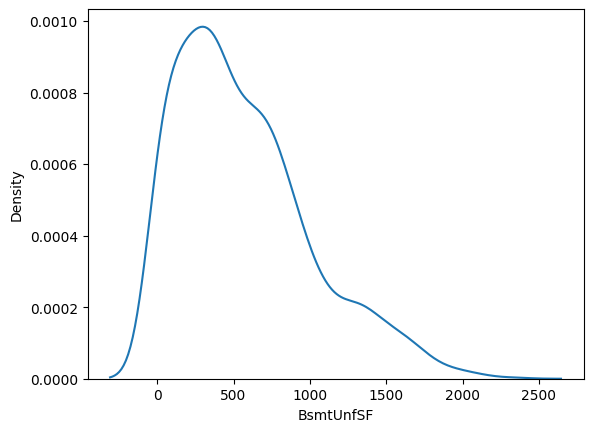

In [19]:
sns.kdeplot(df["BsmtUnfSF"])

In [20]:
outlier["BsmtUnfSF"]

1589.38

In [21]:
df = df[df["BsmtUnfSF"]<=1589]

<Axes: xlabel='BsmtUnfSF', ylabel='Density'>

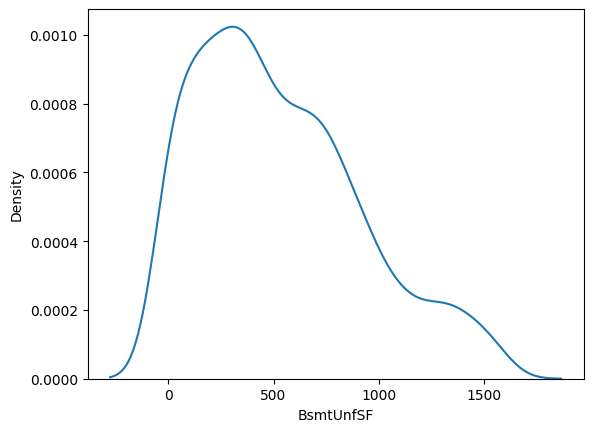

In [22]:
sns.kdeplot(df["BsmtUnfSF"])

### BsmtFullBath

<Axes: xlabel='BsmtFullBath', ylabel='Density'>

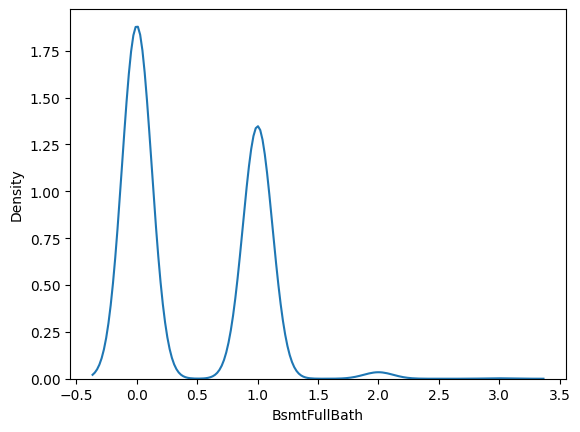

In [23]:
sns.kdeplot(df["BsmtFullBath"])

In [24]:
outlier["BsmtFullBath"]

1.0

In [25]:
df = df[df["BsmtFullBath"]<=1]

<Axes: xlabel='BsmtFullBath', ylabel='Density'>

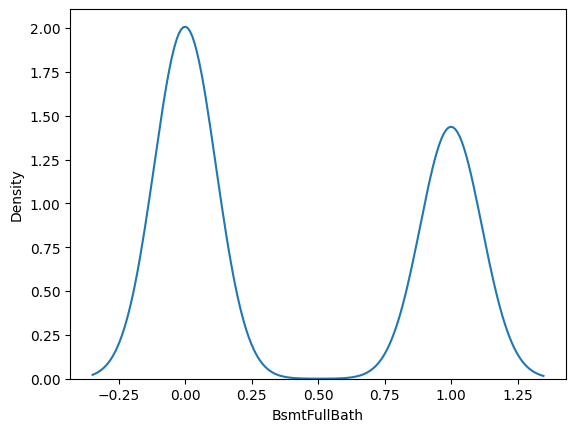

In [26]:
sns.kdeplot(df["BsmtFullBath"])

### HalfBath 

<Axes: xlabel='HalfBath', ylabel='Density'>

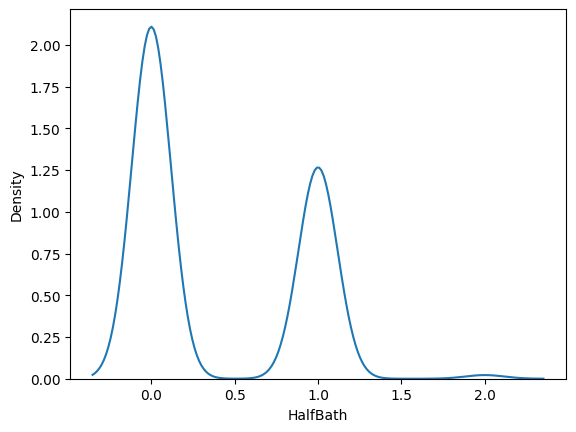

In [27]:
sns.kdeplot(df["HalfBath"])

In [28]:
outlier["HalfBath"]

1.0

In [29]:
df = df[df["HalfBath"]<=1]

<Axes: xlabel='HalfBath', ylabel='Density'>

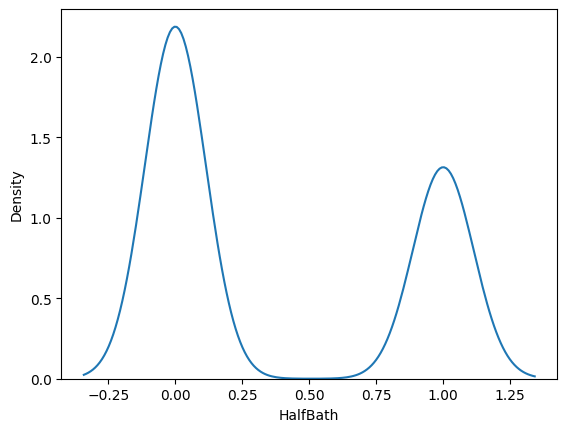

In [30]:
sns.kdeplot(df["HalfBath"])

### LotArea

<Axes: xlabel='LotArea', ylabel='Density'>

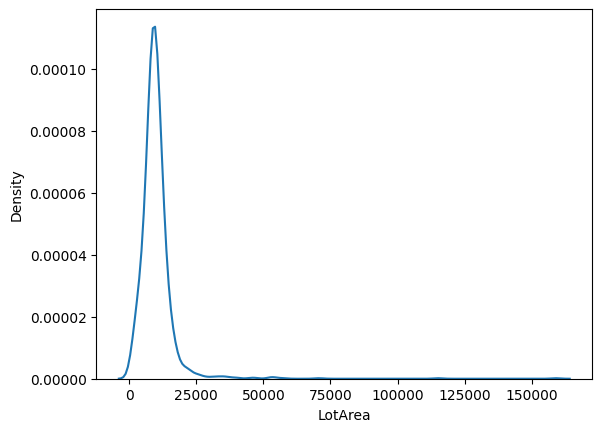

In [31]:
sns.kdeplot(df["LotArea"])

In [32]:
outlier["LotArea"]

21571.800000000003

In [33]:
df = df[df["LotArea"]<=21571.800000000003]

<Axes: xlabel='LotArea', ylabel='Density'>

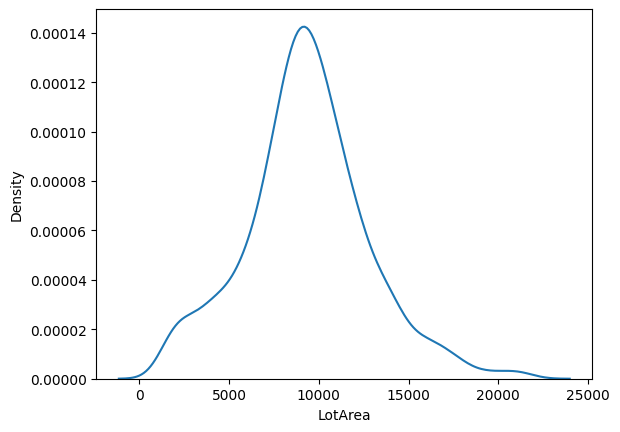

In [34]:
sns.kdeplot(df["LotArea"])

<Axes: xlabel='LotArea'>

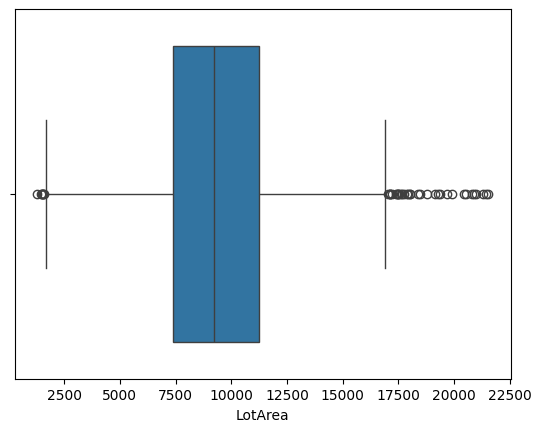

In [35]:
sns.boxplot(x=df["LotArea"])

### 2ndFlrSF

<Axes: xlabel='2ndFlrSF', ylabel='Density'>

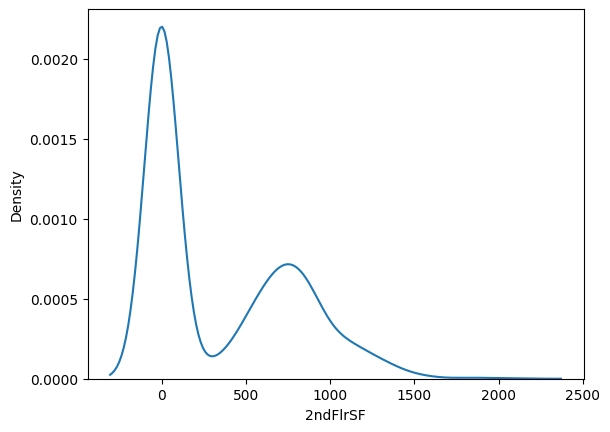

In [36]:
sns.kdeplot(df["2ndFlrSF"])

In [37]:
outlier["2ndFlrSF"]

1245.5300000000002

In [38]:
df = df[df["2ndFlrSF"]<=1245.5300000000002]

<Axes: xlabel='2ndFlrSF', ylabel='Density'>

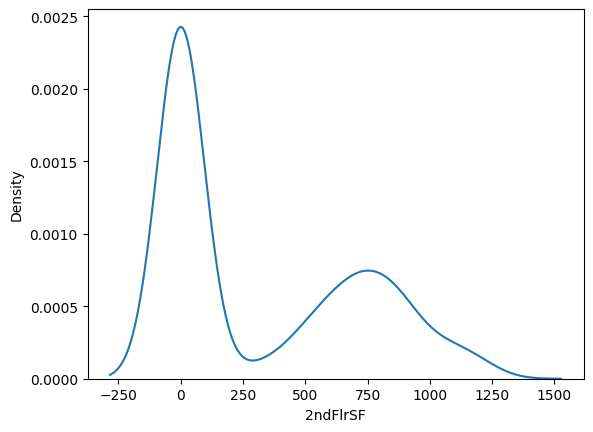

In [39]:
sns.kdeplot(df["2ndFlrSF"])

### OpenPorchSF

<Axes: xlabel='OpenPorchSF', ylabel='Density'>

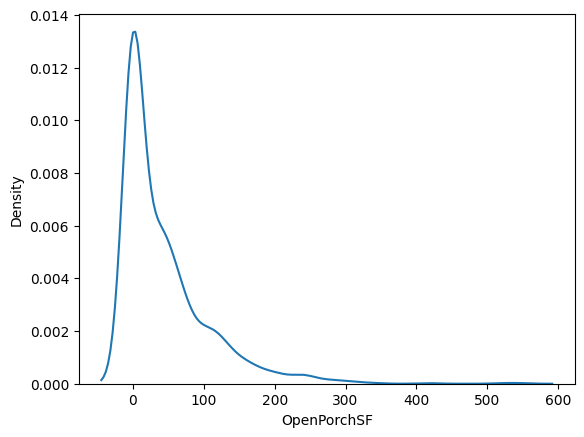

In [40]:
sns.kdeplot(df["OpenPorchSF"])

In [41]:
outlier["OpenPorchSF"]

213.23000000000002

In [42]:
df = df[df["OpenPorchSF"]<=213.23000000000002]

<Axes: xlabel='OpenPorchSF', ylabel='Density'>

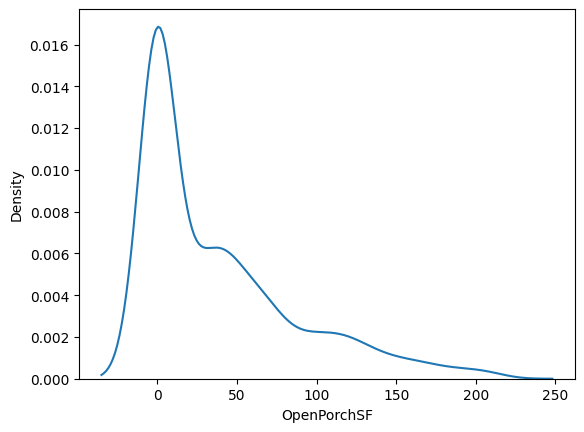

In [43]:
sns.kdeplot(df["OpenPorchSF"])

### WoodDeckSF

<Axes: xlabel='WoodDeckSF', ylabel='Density'>

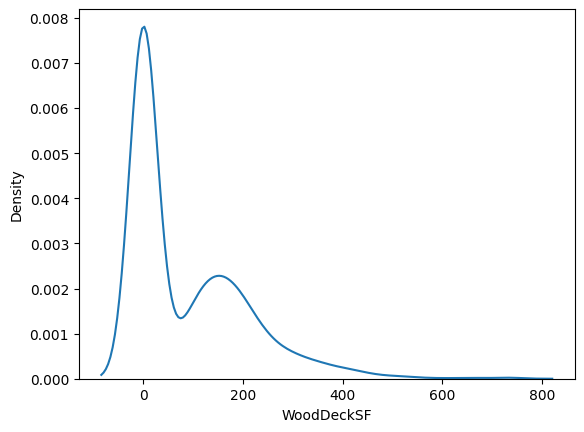

In [44]:
sns.kdeplot(df["WoodDeckSF"])

In [45]:
outlier["WoodDeckSF"]

385.3800000000001

In [46]:
df = df[df["WoodDeckSF"]<=385.3800000000001]

<Axes: xlabel='WoodDeckSF', ylabel='Density'>

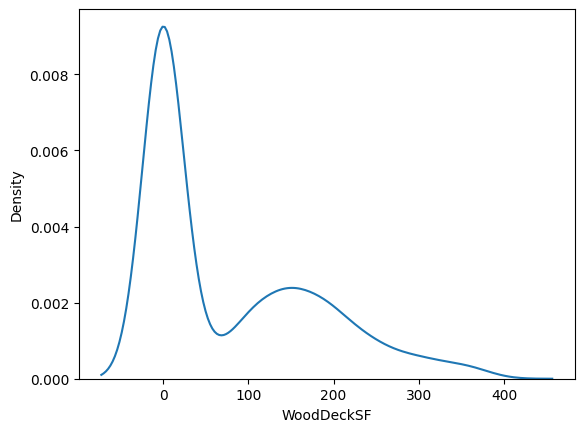

In [47]:
sns.kdeplot(df["WoodDeckSF"])

### LotFrontage

<Axes: xlabel='LotFrontage', ylabel='Density'>

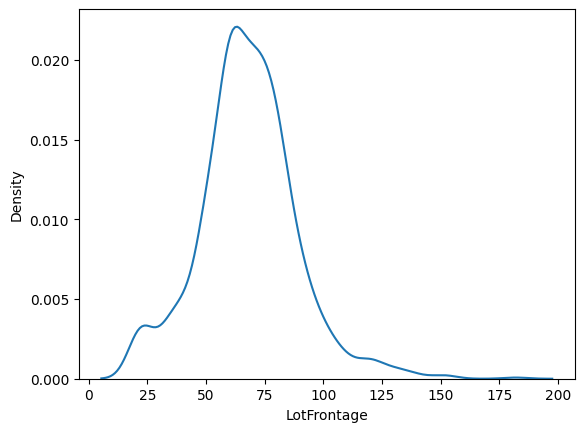

In [48]:
sns.kdeplot(df["LotFrontage"])

In [49]:
outlier["LotFrontage"]

120.0

In [50]:
df = df[df["LotFrontage"]<=120]

<Axes: xlabel='LotFrontage', ylabel='Density'>

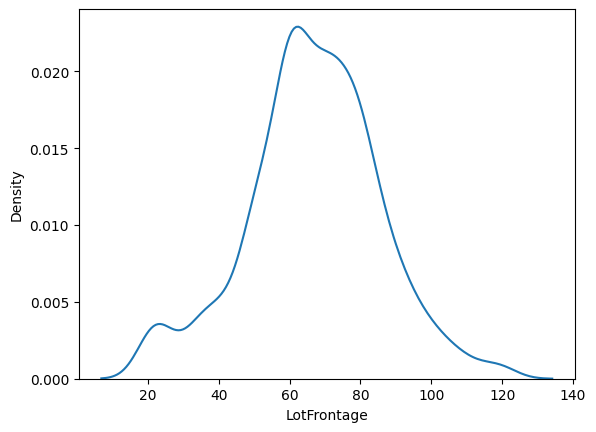

In [51]:
sns.kdeplot(df["LotFrontage"])

### BsmtFinSF1

<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

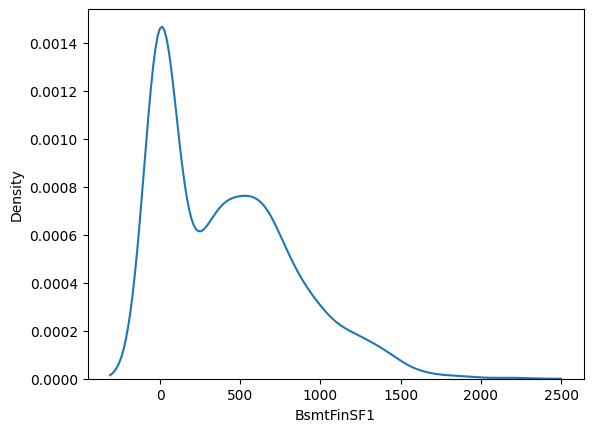

In [52]:
sns.kdeplot(df["BsmtFinSF1"])

In [53]:
outlier["BsmtFinSF1"]

1375.9900000000002

In [54]:
df = df[df["BsmtFinSF1"]<=1375.9900000000002]

<Axes: xlabel='BsmtFinSF1', ylabel='Density'>

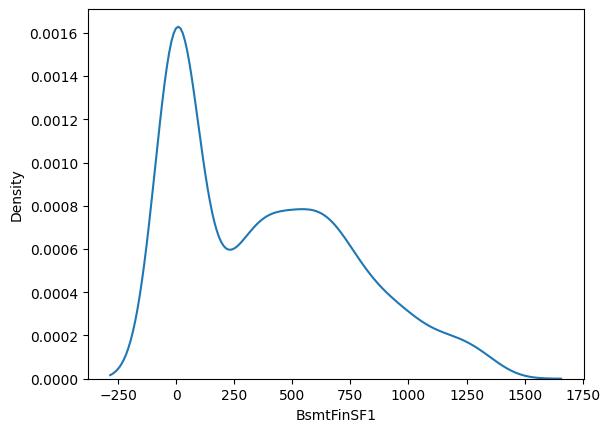

In [55]:
sns.kdeplot(df["BsmtFinSF1"])

### Fireplaces

<Axes: xlabel='Fireplaces', ylabel='Density'>

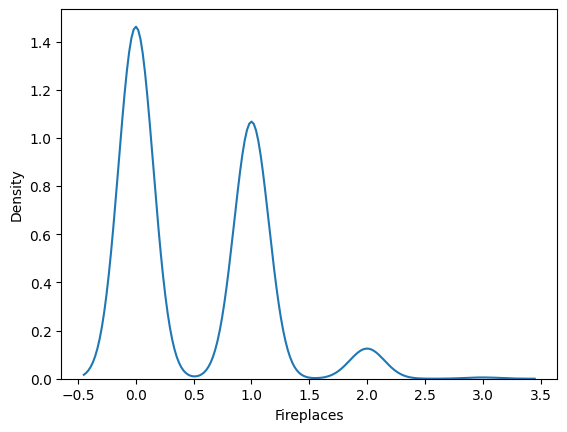

In [56]:
sns.kdeplot(df["Fireplaces"])

In [57]:
outlier["Fireplaces"]

2.0

In [58]:
df = df[df["Fireplaces"]<=2]

<Axes: xlabel='Fireplaces', ylabel='Density'>

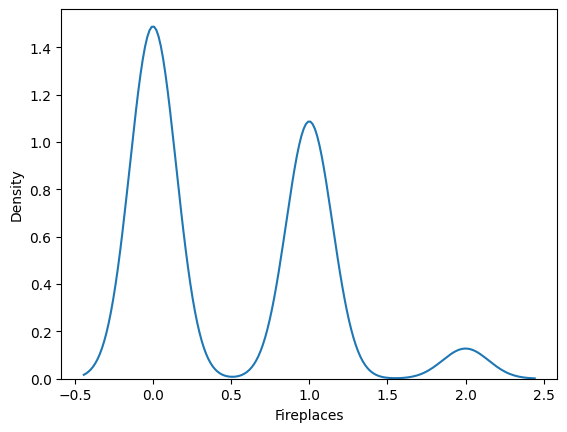

In [59]:
sns.kdeplot(df["Fireplaces"])

### MasVnrArea

<Axes: xlabel='MasVnrArea', ylabel='Density'>

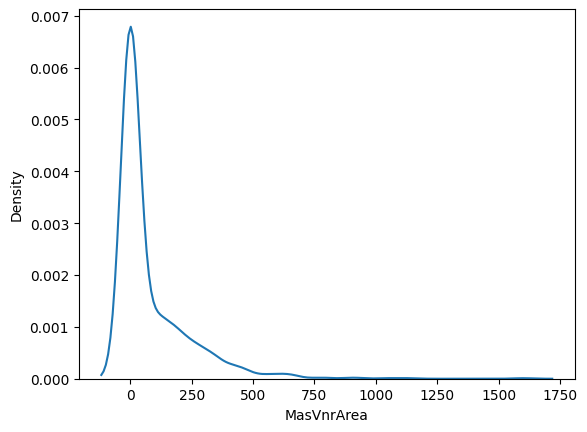

In [60]:
sns.kdeplot(df["MasVnrArea"])

In [61]:
outlier["MasVnrArea"]

574.4100000000001

In [62]:
df = df[df["MasVnrArea"]<=574.4100000000001]

<Axes: xlabel='MasVnrArea', ylabel='Density'>

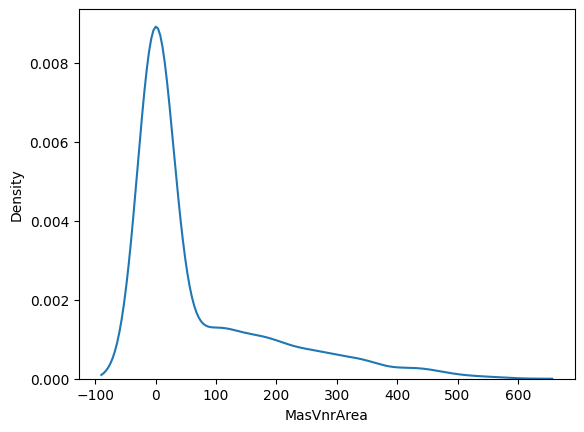

In [63]:
sns.kdeplot(df["MasVnrArea"])

### GarageYrBlt

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

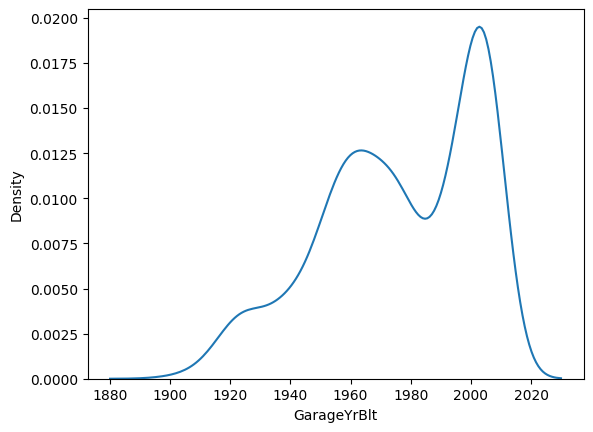

In [64]:
sns.kdeplot(df["GarageYrBlt"])

In [65]:
outlier["GarageYrBlt"]

2008.0

In [66]:
df = df[df["GarageYrBlt"]<=2008]

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

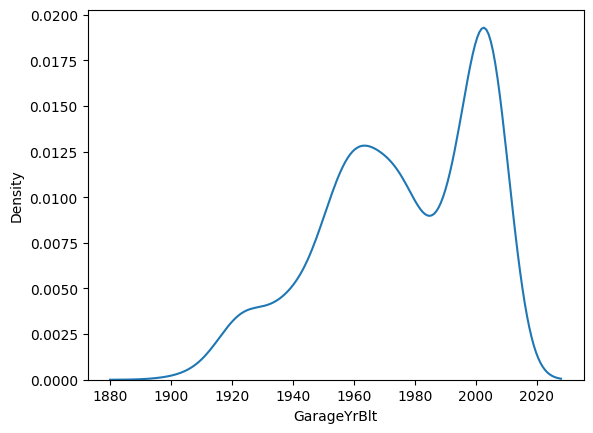

In [67]:
sns.kdeplot(df["GarageYrBlt"])

### YearRemodAdd

<Axes: xlabel='YearRemodAdd', ylabel='Density'>

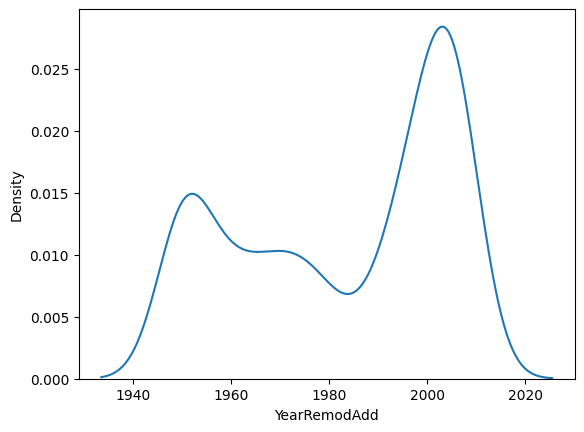

In [68]:
sns.kdeplot(df["YearRemodAdd"])

In [69]:
outlier["YearRemodAdd"]

2008.0

### YearBuilt

<Axes: xlabel='YearBuilt', ylabel='Density'>

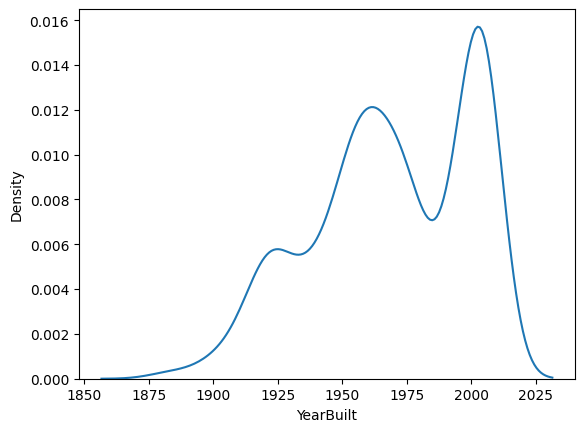

In [70]:
sns.kdeplot(df["YearBuilt"])

In [71]:
outlier["YearBuilt"]

2007.0

In [72]:
df = df[df["YearBuilt"]>=1900]

<Axes: xlabel='YearBuilt', ylabel='Density'>

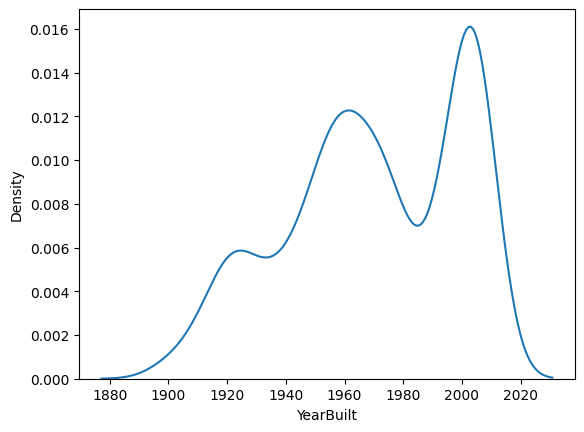

In [73]:
sns.kdeplot(df["YearBuilt"])

<Axes: xlabel='YearBuilt'>

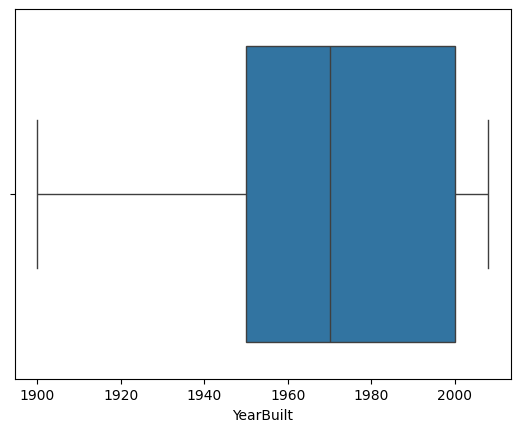

In [74]:
sns.boxplot(x=df["YearBuilt"])

### TotRmsAbvGrd

<Axes: xlabel='TotRmsAbvGrd', ylabel='Density'>

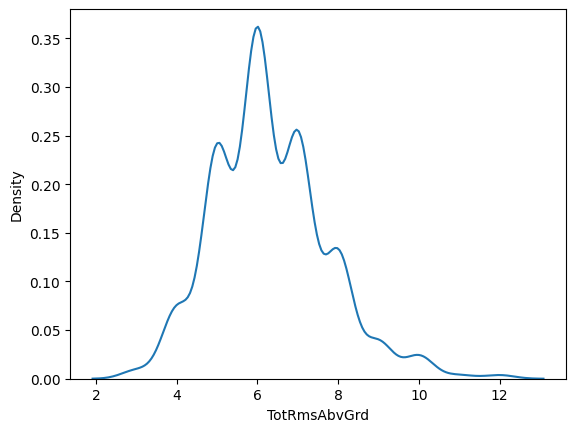

In [75]:
sns.kdeplot(df["TotRmsAbvGrd"])

In [76]:
outlier["TotRmsAbvGrd"]

10.0

In [77]:
df = df[df["TotRmsAbvGrd"]<=10]

<Axes: xlabel='TotRmsAbvGrd', ylabel='Density'>

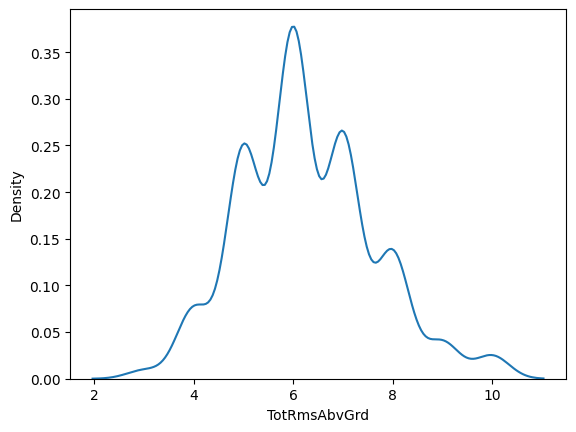

In [78]:
sns.kdeplot(df["TotRmsAbvGrd"])

### FullBath

<Axes: xlabel='FullBath', ylabel='Density'>

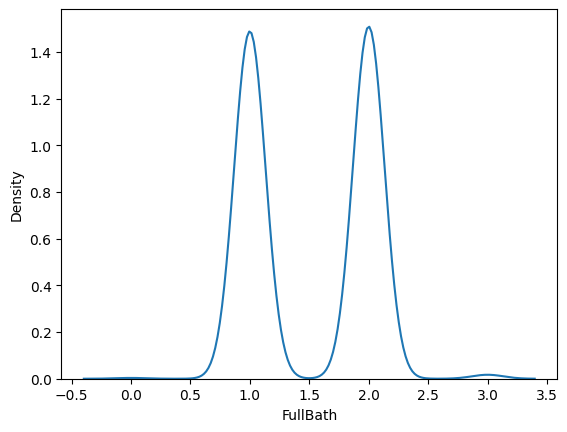

In [79]:
sns.kdeplot(df["FullBath"])

In [80]:
df = df[(df["FullBath"]>=0.5) & (df["FullBath"]<=2.5) ]

<Axes: xlabel='FullBath', ylabel='Density'>

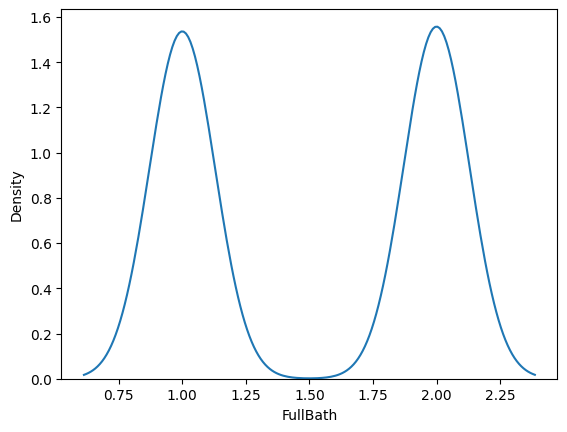

In [81]:
sns.kdeplot(df["FullBath"])

### 1stFlrSF

<Axes: xlabel='1stFlrSF', ylabel='Density'>

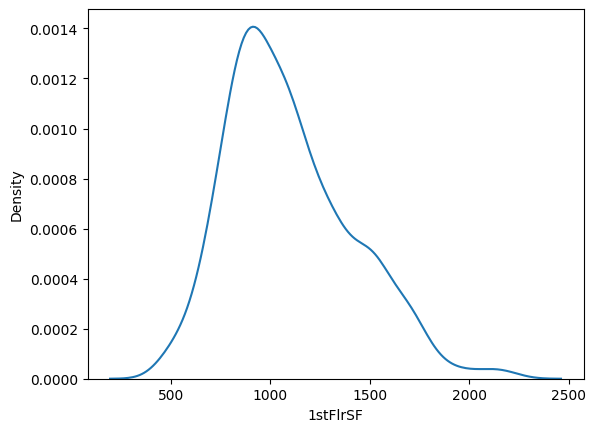

In [82]:
sns.kdeplot(df["1stFlrSF"])

In [83]:
outlier["1stFlrSF"]

1981.6100000000001

In [84]:
df = df[df["1stFlrSF"]<=1981]

<Axes: xlabel='1stFlrSF', ylabel='Density'>

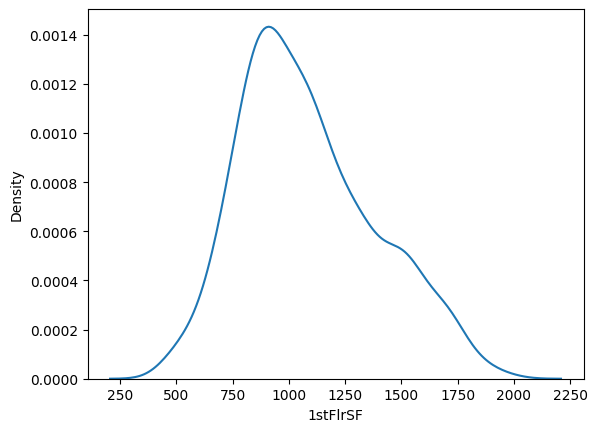

In [85]:
sns.kdeplot(df["1stFlrSF"])

### TotalBsmtSF

<Axes: xlabel='TotalBsmtSF', ylabel='Density'>

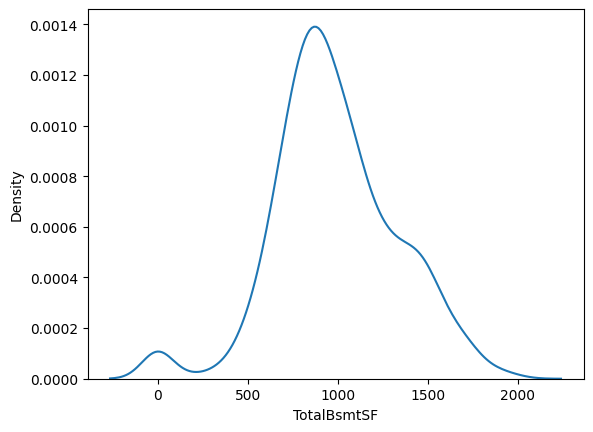

In [86]:
sns.kdeplot(df["TotalBsmtSF"])

In [87]:
outlier["TotalBsmtSF"]

1905.46

In [88]:
df = df[df["TotalBsmtSF"]>=250]

<Axes: xlabel='TotalBsmtSF', ylabel='Density'>

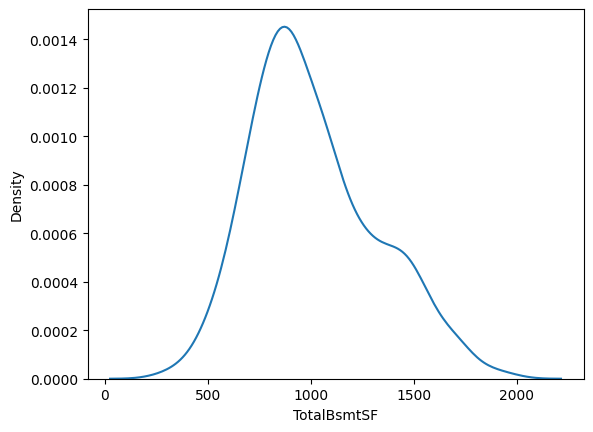

In [89]:
sns.kdeplot(df["TotalBsmtSF"])

### GarageArea

<Axes: xlabel='GarageArea', ylabel='Density'>

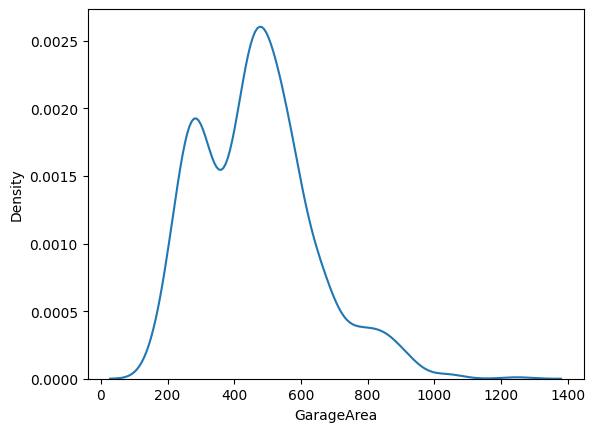

In [90]:
sns.kdeplot(df["GarageArea"])

### GarageCars

<Axes: xlabel='GarageCars', ylabel='Density'>

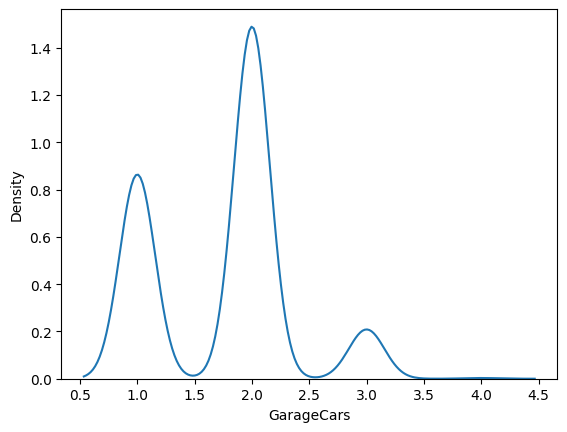

In [91]:
sns.kdeplot(df["GarageCars"])

In [92]:
outlier["GarageCars"]

3.0

In [93]:
df = df[df["GarageCars"]<=3]

<Axes: xlabel='GarageCars', ylabel='Density'>

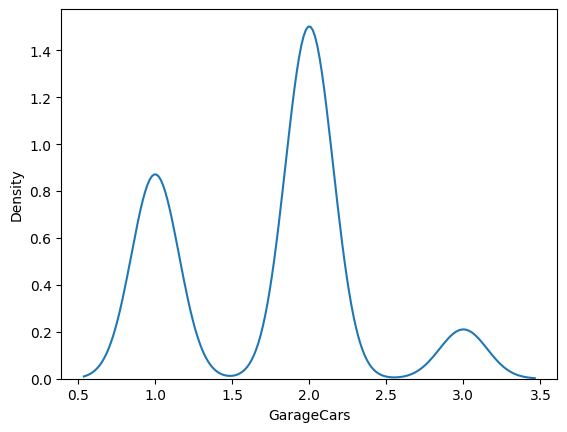

In [94]:
sns.kdeplot(df["GarageCars"])

### GrLivArea

<Axes: xlabel='GrLivArea', ylabel='Density'>

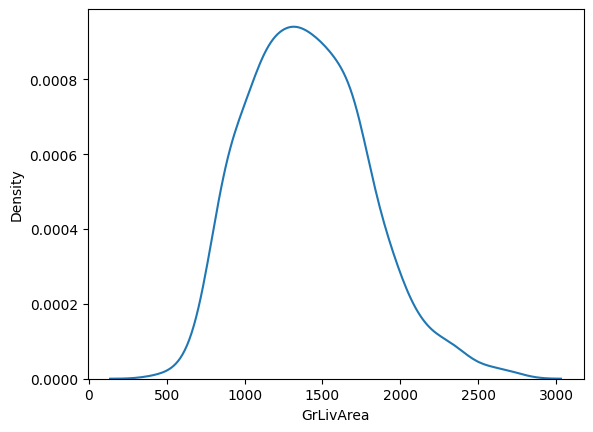

In [95]:
sns.kdeplot(df["GrLivArea"])

### OverallQual

<Axes: xlabel='OverallQual', ylabel='Density'>

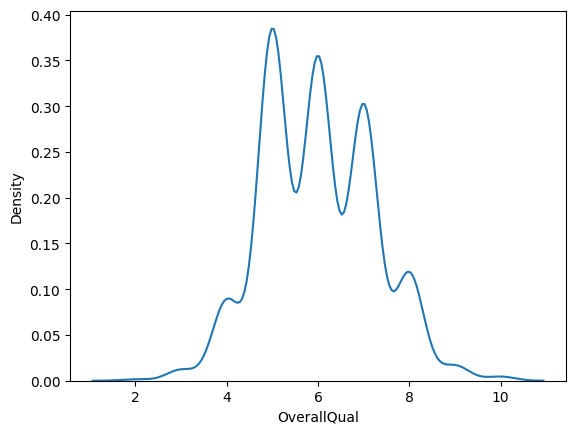

In [96]:
sns.kdeplot(df["OverallQual"])

# Feature Engineering

In [97]:
# FEATURE ENGINEERIN YAPMA SEBEBİMİZ DAHA FAZLA VERİNİN DAHA İYİ OLMASI

In [98]:
df["Total_bath"] = df["BsmtFullBath"] + df["BsmtHalfBath"]
df["House_age"] = 2024 - df["YearBuilt"]

In [99]:
df["Total_floor_square"] = df["1stFlrSF"] + df["2ndFlrSF"]

In [100]:
x = df[["BsmtUnfSF","BsmtFullBath","HalfBath","LotArea","2ndFlrSF","OpenPorchSF","WoodDeckSF","LotFrontage",
        "BsmtFinSF1","Fireplaces","MasVnrArea","GarageYrBlt","YearRemodAdd","YearBuilt","TotRmsAbvGrd",
        "FullBath","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual","Total_bath","House_age","Total_floor_square"]]

y = df["SalePrice"]

In [101]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_bath,House_age,Total_floor_square
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1,21,1710
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1,48,1262
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,23,1786
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,109,1717
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1,24,2198


# Data Imputation

In [102]:
from sklearn.impute import KNNImputer

In [103]:
knn = KNNImputer()
knn_data = knn.fit_transform(x)

In [104]:
x.head()

,BsmtUnfSF,BsmtFullBath,HalfBath,LotArea,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Total_bath,House_age,Total_floor_square
0,150,1,1,8450,854,61,0,65.0,706,0,196.0,2003.0,2003,2003,8,2,856,856,548,2,1710,7,1,21,1710
1,284,0,0,9600,0,0,298,80.0,978,1,0.0,1976.0,1976,1976,6,2,1262,1262,460,2,1262,6,1,48,1262
2,434,1,1,11250,866,42,0,68.0,486,1,162.0,2001.0,2002,2001,6,2,920,920,608,2,1786,7,1,23,1786
3,540,1,0,9550,756,35,0,60.0,216,1,0.0,1998.0,1970,1915,7,1,961,756,642,3,1717,7,1,109,1717
4,490,1,1,14260,1053,84,192,84.0,655,1,350.0,2000.0,2000,2000,9,2,1145,1145,836,3,2198,8,1,24,2198


In [105]:
x.shape

(848, 25)

In [106]:
x.isnull().sum()

BsmtUnfSF             0
BsmtFullBath          0
HalfBath              0
LotArea               0
2ndFlrSF              0
OpenPorchSF           0
WoodDeckSF            0
LotFrontage           0
BsmtFinSF1            0
Fireplaces            0
MasVnrArea            0
GarageYrBlt           0
YearRemodAdd          0
YearBuilt             0
TotRmsAbvGrd          0
FullBath              0
1stFlrSF              0
TotalBsmtSF           0
GarageArea            0
GarageCars            0
GrLivArea             0
OverallQual           0
Total_bath            0
House_age             0
Total_floor_square    0
dtype: int64

# PCA

In [107]:
from sklearn.decomposition import PCA

In [108]:
df.shape

(848, 84)

In [109]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_bath,House_age,Total_floor_square
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1,21,1710
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1,48,1262
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,23,1786
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,109,1717
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1,24,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000,1,19,1072
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000,1,20,1221
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,0,25,1647
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,N

In [110]:
pca = PCA(25)

In [111]:
data = pca.fit_transform(x)

In [112]:
data_dff = pd.DataFrame(data, columns=x.columns)

In [113]:
data_dff

,BsmtUnfSF,BsmtFullBath,HalfBath,LotArea,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Total_bath,House_age,Total_floor_square
0,-383.508486,529.708102,-220.376836,-704.966445,-154.960095,-52.392467,48.733518,-96.525636,34.982937,24.781650,-35.888523,7.245990,5.285439,-1.421884,1.708384,0.637841,0.854644,0.632371,-0.265430,-0.006659,0.047805,0.201520,-0.002557,4.388251e-14,-3.524982e-14
1,747.608199,-454.277107,509.857579,-405.772374,-15.673790,-78.778824,-72.994408,206.969435,-74.886577,-44.716100,7.001404,0.033082,-13.652109,-10.340957,2.447647,-0.145877,0.329884,-0.639067,0.066782,-0.458977,-0.318102,0.167100,0.627744,9.641282e-14,-1.289639e-13
2,2417.573243,550.618908,-335.141616,-341.367434,-175.897655,-28.167568,24.619041,-91.802840,35.752720,3.222146,-42.107827,9.043828,6.127864,5.784986,-2.890450,-0.721431,-1.134336,0.542751,0.556314,-0.171250,0.172071,0.278490,-0.004181,1.046003e-12,4.275862e-13
3,708.892953,547.870038,-411.464826,-93.858210,-59.947827,163.463737,-94.331052,-98.546790,-36.308392,-40.691757,41.078143,-10.702021,14.004303,22.706492,40.104275,-1.678369,0.542423,0.943928,0.732790,-0.139493,-0.660163,-0.703265,-0.046455,1.086906e-12,3.695439e-13
4,5475.339000,1004.334742,-82.933802,-451.946458,-310.466936,43.411855,169.870878,21.974584,1.882229,-12.630336,15.819624,2.171407,4.359388,5.471926,-7.802939,0.019320,0.441129,0.526548,0.216067,0.037744,-0.044482,-0.148468,-0.022336,-3.084118e-13,-1.680383e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,-5210.669579,-389.189681,48.774767,-484.719610,116.315453,363.290076,43.559460,-143.041742,-141.426722,67.124367,-73.317378,3.163698,0.552135,8.739067,-8.839620,0.959261,-0.509567,0.571471,0.208104,0.040820,0.115426,-0.505308,-0.087847,1.592780e-13,-1.423283e-14
844,-1359.693982,-234.403660,350.225202,314.492472,23.345332,-92.348426,-86.134265,-36.821610,15.861702,103.940203,-13.386413,-2.585334,2.856849,-1.271222,5.864242,-0.023330,0.700051,0.886980,-0.102903,-0.367077,-0.324128,0.056323,-0.011580,1.084054e-13,-1.802103e-14
845,-923.663054,626.022560,-290.896240,382.836605,-33.794992,-55.411054,-84.160231,-30.442357,27.140757,19.390644,-48.307688,4.373290,-2.171798,-1.640592,2.245275,0.628724,-0.333033,-0.404242,0.599581,0.032923,-0.127547,0.168650,0.005863,9.469638e-14,-1.962114e-14
846,273.402694,1568.080303,-44.608811,-4.436771,242.940889,-275.902254,-133.401156,-30.085412,45.414421,-12.922786,19.100834,-9.299806,29.727905,-9.866167,-3.428599,-0.108586,0.244910,-0.630117,0.550856,-0.667026,0.665468,-0.361114,-0.058655,1.777224e-13,5.573767e-15


# SCALING

In [114]:
from sklearn.preprocessing import scale, normalize

In [115]:
x_scale = scale(x)

In [116]:
x_df = pd.DataFrame(x_scale, columns=x.columns)

In [117]:
x_df

,BsmtUnfSF,BsmtFullBath,HalfBath,LotArea,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Total_bath,House_age,Total_floor_square
0,-1.071318,1.240533,1.341149,-0.131574,1.396141,0.542861,-0.768704,-0.067432,0.817634,-0.886922,1.021768,1.032486,0.911464,1.100461,1.308512,1.004728,-0.755404,-0.514072,0.484797,0.430611,0.790124,0.827019,1.091625,-1.100461,0.799815
1,-0.724350,-0.806105,-0.745629,0.240646,-0.821715,-0.759180,2.258154,0.738708,1.549150,0.807019,-0.607087,-0.006626,-0.352245,0.199440,-0.198098,1.004728,0.585294,0.813647,-0.032897,0.430611,-0.370465,-0.001955,1.091625,-0.199440,-0.360403
2,-0.335954,1.240533,1.341149,0.774700,1.427305,0.137307,-0.768704,0.093796,0.225966,0.807019,0.739212,0.955514,0.864660,1.033718,-0.198098,1.004728,-0.544063,-0.304777,0.837770,0.430611,0.987010,0.827019,1.091625,-1.033718,0.996637
3,-0.061487,1.240533,-0.745629,0.224462,1.141633,-0.012107,-0.768704,-0.336145,-0.500171,0.807019,-0.607087,0.840058,-0.633069,-1.836200,0.555207,-0.995294,-0.408672,-0.841097,1.037788,2.113366,0.808259,0.827019,1.091625,1.836200,0.817943
4,-0.190952,1.240533,1.341149,1.748944,1.912948,1.033794,1.181486,0.953679,0.680475,0.807019,2.301583,0.917029,0.771052,1.000347,2.061816,1.004728,0.198935,0.431028,2.179068,2.113366,2.054338,1.655994,1.091625,-1.000347,2.063623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,-1.459714,1.240533,-0.745629,-1.677094,-0.821715,-0.161522,-0.768704,-1.679712,0.390020,-0.886922,0.057752,1.109457,1.005072,1.167203,-0.951403,-0.995294,-0.042127,-1.524578,0.349491,0.430611,-0.862680,-0.830930,1.091625,-1.167203,-0.852459
844,0.640216,1.240533,-0.745629,-0.439060,-0.821715,1.652797,-0.768704,-0.228660,0.021572,-0.886922,-0.607087,1.070971,1.005072,1.133832,-0.198098,1.004728,0.449903,0.679567,-0.385870,0.430611,-0.476680,0.827019,1.091625,-1.133832,-0.466583
845,1.007898,-0.806105,1.341149,-0.304090,0.980618,0.094617,-0.768704,-0.228660,-1.081081,0.807019,-0.607087,0.878543,0.771052,0.966976,0.555207,1.004728,-0.435090,-0.196859,-0.032897,0.430611,0.626916,-0.001955,-0.890598,-0.966976,0.636659
846,0.811110,-0.806105,-0.745629,0.060038,2.170053,0.521516,-0.768704,-0.013689,-0.341496,2.500961,-0.607087,-1.353623,1.051877,-0.968550,2.061816,1.004728,0.340930,0.453920,-1.256537,-1.252144,2.422204,0.827019,-0.890598,0.968550,2.431370


# NORMALIZATION

In [118]:
x_norm = normalize(x)

In [119]:
x_dff = pd.DataFrame(x_norm, columns=[x.columns])

In [120]:
x_dff

,BsmtUnfSF,BsmtFullBath,HalfBath,LotArea,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Total_bath,House_age,Total_floor_square
0,0.015609,0.000104,0.000104,0.879304,0.088867,0.006348,0.000000,0.006764,0.073466,0.000000,0.020396,0.208431,0.208431,0.208431,0.000832,0.000208,0.089075,0.089075,0.057025,0.000208,0.177942,0.000728,0.000104,0.002185,0.177942
1,0.026885,0.000000,0.000000,0.908777,0.000000,0.000000,0.028210,0.007573,0.092582,0.000095,0.000000,0.187057,0.187057,0.187057,0.000568,0.000189,0.119466,0.119466,0.043546,0.000189,0.119466,0.000568,0.000095,0.004544,0.119466
2,0.035647,0.000082,0.000082,0.924032,0.071130,0.003450,0.000000,0.005585,0.039918,0.000082,0.013306,0.164354,0.164437,0.164354,0.000493,0.000164,0.075565,0.075565,0.049939,0.000164,0.146695,0.000575,0.000082,0.001889,0.146695
3,0.051146,0.000095,0.000000,0.904522,0.071604,0.003315,0.000000,0.005683,0.020458,0.000095,0.000000,0.189239,0.186587,0.181378,0.000663,0.000095,0.091021,0.071604,0.060807,0.000284,0.162625,0.000663,0.000095,0.010324,0.162625
4,0.032290,0.000066,0.000066,0.939698,0.069390,0.005535,0.012652,0.005535,0.043163,0.000066,0.023064,0.131795,0.131795,0.131795,0.000593,0.000132,0.075453,0.075453,0.055090,0.000198,0.144843,0.000527,0.000066,0.001582,0.144843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,0.000000,0.000183,0.000000,0.672125,0.000000,0.005121,0.000000,0.006401,0.100041,0.000000,0.014631,0.366697,0.366697,0.366697,0.000914,0.000183,0.196059,0.100041,0.096018,0.000366,0.196059,0.000914,0.000183,0.003475,0.196059
844,0.093479,0.000115,0.000000,0.864480,0.000000,0.013025,0.000000,0.007146,0.047258,0.000000,0.000000,0.230989,0.231104,0.230989,0.000692,0.000231,0.140737,0.140737,0.046106,0.000231,0.140737,0.000807,0.000115,0.002305,0.140737
845,0.104279,0.000000,0.000109,0.866293,0.075939,0.004377,0.000000,0.006784,0.000000,0.000109,0.000000,0.218734,0.218844,0.218734,0.000766,0.000219,0.104279,0.104279,0.050334,0.000219,0.180218,0.000657,0.000000,0.002736,0.180218
846,0.083903,0.000000,0.000000,0.865048,0.110212,0.005740,0.000000,0.006314,0.026309,0.000191,0.000000,0.185696,0.191914,0.185696,0.000861,0.000191,0.113656,0.110212,0.024109,0.000096,0.223868,0.000670,0.000000,0.007941,0.223868


# Modelling

In [121]:
abs(df.corr(numeric_only = True)["SalePrice"]).sort_values(ascending = True).tail(24)

2ndFlrSF              0.241645
BsmtFullBath          0.241850
HalfBath              0.267525
WoodDeckSF            0.308193
LotFrontage           0.313517
LotArea               0.336555
MasVnrArea            0.350597
BsmtFinSF1            0.369964
OpenPorchSF           0.402547
Fireplaces            0.411802
TotRmsAbvGrd          0.473405
GarageYrBlt           0.544481
1stFlrSF              0.558808
YearRemodAdd          0.564460
GarageArea            0.571586
TotalBsmtSF           0.587316
FullBath              0.592561
GarageCars            0.613240
YearBuilt             0.614176
House_age             0.614176
GrLivArea             0.672672
Total_floor_square    0.679217
OverallQual           0.788174
SalePrice             1.000000
Name: SalePrice, dtype: float64

In [122]:
x = pd.get_dummies(x,drop_first=True) # YOK SAYAMAYACAĞIMIZ OBJLERİ BİRBİRLERİ ARASINDA ÜSTÜNLÜK OLMADAN BİRİM MATRİSE ÇEVİRİYORUZ

In [123]:
def regression_test(x,y): # x ve y parametrelerini alir
    """
    x parametresi : seçilen verilerin özelliklerini tutar 
    y parametresi : seçilen verilerin target(hedefini) tutar.

    NOT : Girilen her bir parametre buraya not olarak bu şekilde girilir.
    
    """
    # modellerimi aktif ediyoruz
    L = LinearRegression()
    R = Ridge()
    E = ElasticNet()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    KN = KNeighborsRegressor()
    DT = DecisionTreeRegressor()
    XGB = XGBRegressor()

    # model değişkenlerini bir listede tutuyoruz, sebebi tamamiyle düzen (clean code)
    modelling = [L, R, E, Lass, ETR, GBR, KN, DT, XGB]

    # model isimlerin bir listede tutuyoruz, sebebi tamamiyle düzen (clean code)
    modelling_name = ["LinearRegression","Ridge","ElasticNet",
                       "Lasso","ExtraTreeRegressor",
                       "GradientBoostingRegressor",
                       "KNeighborsRegressor",
                       "DecisionTreeRegresssor","XGBRegressor"]

    # train ve test verilerini ayırıyoruz (%20 - %80)
    # x_train ile y_train birleşip x_test'te test edilir. y_test ile karşılaştırılır.
    # score y_test sayesinde bulunur. score'a kadar y_test saklanir. makine görmez
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    
    # DataFrame  içine koyduğumuz r_squared verilerini tutucağımız boş liste. oldukça ekliyoruz
    r_squared = []

    # DataFrame  içine koyduğumuz rmse verilerini tutucağımız boş liste. oldukça ekliyoruz
    rmse = []

    # DataFrame  içine koyduğumuz mae verilerini tutucağımız boş liste. oldukça ekliyoruz
    mae = []

    # Düzgün görünmesi açısından bir DataFrame oluşturacak güzel görüyoruz meeen
    # columns: ana sütun isimleri
    # index: soldan sıralamyı model isimlerine göre yazıyoruz.(Ridge, Lasso etc.)
    result = pd.DataFrame(columns=["R_SQUARED","RMSE","MAE"], index=modelling_name)

    # bu for döngüsü her bir r_squared, rmse ve mae bos listerine ekleme yapar.
    # clean code için(biladerim için)
    # modelling: her bir modelimizin değişkenlerini(kendisi)nin tutulduğu liste 
    # model: her bir modeli tek tek denemek üzere çağırır
    for model in modelling:

        # modeli önce fit(öğretir)[x_train,y_train] sonra predict(tahmin)[x_test üzerinde] eder.
        prediction = model.fit(x_train,y_train).predict(x_test)

        # her bir modelin r_squared score'unu boş listeye ekler
        r_squared.append(r2_score(y_test,prediction))

        # her bir modelin rmse score'unu bos listeye ekler
        rmse.append(mean_squared_error(y_test,prediction)**0.5)

        # her # her bir modelin mae score'unu bos listeye ekler
        mae.append(mean_absolute_error(y_test,prediction))

    # Toplanan tüm R_SQUARED değerleri DataFrame'e ekliyoruz
    result.R_SQUARED = r_squared

    # Toplanan tüm RMSE değerlerini DataFrame'e ekliyoruz
    result.RMSE = rmse

    # Toplanan tüm MAE değerlerini DataFrame'e ekliyoruz
    result.MAE = mae

    # En son tüm modellerin tüm sonuçlarını R_SQUARED'a göre sıralanır,
    # Yani R_SQUARED'ı kiminki büyükse onu en başa getirir.
    # sort_values: küçükten büyüğe ya da büyükten küçüğe sıralatır.
    # ascending = False: Büyükten küçüğe sırala demektir.
    
    best_model = result.sort_values("R_SQUARED", ascending=False)

    # En sonunda best_model yani sonuç DataFrame'ini döndürür.
    return best_model

In [124]:
regression_test(x,y)

,R_SQUARED,RMSE,MAE
GradientBoostingRegressor,0.856493,22608.660041,15016.825700
Ridge,0.854491,22765.861295,15379.663254
Lasso,0.854435,22770.194272,15388.393440
LinearRegression,0.854424,22771.067537,15389.967898
ElasticNet,0.847655,23294.500127,15719.740047
XGBRegressor,0.831336,24510.348297,17052.388327
DecisionTreeRegresssor,0.760908,29182.414356,21350.500000
KNeighborsRegressor,0.669135,34329.264157,24829.417647
ExtraTreeRegressor,0.664055,34591.789342,24038.794118


# Model Evaluation

In [125]:
# MODEL EVALUTAION AMACI PERFORMANS ARTIRMAK

In [126]:
l = LinearRegression()

In [127]:
l.fit(x,y)

LinearRegression()

In [128]:
l.coef_

array([-4.14177270e+00,  5.26519239e+03,  1.86709051e+03,  1.37880905e+00,
        6.56580695e+00,  4.02282931e+01,  2.10619769e+01,  1.44352301e+02,
        2.30450080e+01,  5.90815103e+03, -3.07049250e+00,  2.26898028e+00,
        4.42913709e+02,  6.66647041e+01, -1.06718047e+03, -4.21809072e+03,
       -4.78742769e+00,  3.60851854e+01,  2.79357794e+01,  1.24874083e+03,
        3.80957599e+01,  1.59171450e+04, -5.38399641e+03, -6.66647041e+01,
        1.77837926e+00])

## Feature Importance

In [129]:
feature_importance = pd.DataFrame({"feature" : x.columns, "Coef" : l.coef_[0]})

In [130]:
feature_importance

,feature,Coef
0,BsmtUnfSF,-4.141773
1,BsmtFullBath,-4.141773
2,HalfBath,-4.141773
3,LotArea,-4.141773
4,2ndFlrSF,-4.141773
5,OpenPorchSF,-4.141773
6,WoodDeckSF,-4.141773
7,LotFrontage,-4.141773
8,BsmtFinSF1,-4.141773
9,Fireplaces,-4.141773


In [131]:
feature_importance.sort_values(by="Coef", ascending=False)

,feature,Coef
0,BsmtUnfSF,-4.141773
13,YearBuilt,-4.141773
23,House_age,-4.141773
22,Total_bath,-4.141773
21,OverallQual,-4.141773
20,GrLivArea,-4.141773
19,GarageCars,-4.141773
18,GarageArea,-4.141773
17,TotalBsmtSF,-4.141773
16,1stFlrSF,-4.141773


## Feature Engineering

In [132]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_bath,House_age,Total_floor_square
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1,21,1710
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1,48,1262
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1,23,1786
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,109,1717
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1,24,2198


In [133]:
x

,BsmtUnfSF,BsmtFullBath,HalfBath,LotArea,2ndFlrSF,OpenPorchSF,WoodDeckSF,LotFrontage,BsmtFinSF1,Fireplaces,MasVnrArea,GarageYrBlt,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,Total_bath,House_age,Total_floor_square
0,150,1,1,8450,854,61,0,65.0,706,0,196.0,2003.0,2003,2003,8,2,856,856,548,2,1710,7,1,21,1710
1,284,0,0,9600,0,0,298,80.0,978,1,0.0,1976.0,1976,1976,6,2,1262,1262,460,2,1262,6,1,48,1262
2,434,1,1,11250,866,42,0,68.0,486,1,162.0,2001.0,2002,2001,6,2,920,920,608,2,1786,7,1,23,1786
3,540,1,0,9550,756,35,0,60.0,216,1,0.0,1998.0,1970,1915,7,1,961,756,642,3,1717,7,1,109,1717
4,490,1,1,14260,1053,84,192,84.0,655,1,350.0,2000.0,2000,2000,9,2,1145,1145,836,3,2198,8,1,24,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0,1,0,3675,0,28,0,35.0,547,0,80.0,2005.0,2005,2005,5,1,1072,547,525,2,1072,5,1,19,1072
1454,811,1,0,7500,0,113,0,62.0,410,0,0.0,2004.0,2005,2004,6,2,1221,1221,400,2,1221,7,1,20,1221
1455,953,0,1,7917,694,40,0,62.0,0,1,0.0,1999.0,2000,1999,7,2,953,953,460,2,1647,6,0,25,1647
1457,877,0,0,9042,1152,60,0,66.0,275,2,0.0,1941.0,2006,1941,9,2,1188,1152,252,1,2340,7,0,83,2340


In [134]:
df ["BsmtUnfSF"] = df["BsmtUnfSF"] ** 45
df["Total_floor_square"] = df["1stFlrSF"] + df["2ndFlrSF"]

### RESULT

In [135]:
regression_test(x,y)

,R_SQUARED,RMSE,MAE
GradientBoostingRegressor,0.855125,22716.211288,15014.584088
Ridge,0.854491,22765.861295,15379.663254
Lasso,0.854435,22770.194272,15388.393440
LinearRegression,0.854424,22771.067537,15389.967898
ElasticNet,0.847655,23294.500127,15719.740047
XGBRegressor,0.831336,24510.348297,17052.388327
ExtraTreeRegressor,0.755730,29496.747731,21335.711765
DecisionTreeRegresssor,0.729700,31028.553667,22041.423529
KNeighborsRegressor,0.669135,34329.264157,24829.417647
